# Method

A ***decision*** tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered. The model is a form of supervised learning, meaning that the model is trained and tested on a set of data that contains the desired categorization. 

A decision tree resembles, well, a tree. The base of the tree is the root node. From the root node flows a series of decision nodes that depict decisions to be made. From the decision nodes are leaf nodes that represent the consequences of those decisions. Each decision node represents a question or split point, and the leaf nodes that stem from a decision node represent the possible answers. Leaf nodes sprout from decision nodes similar to how a leaf sprouts on a tree branch. This is why we call each subsection of a decision tree a “branch.” Let’s take a look at an example for this. You’re a golfer, and a consistent one at that. On any given day you want to predict where your score will be in two buckets: below par or over par.

In this tab, since the simplexity and flexibility of Decision Tree, text data are leveraged with this classificaiton model, to predict the cyberviolence in the text


<img src="https://s2.loli.net/2022/10/29/bqhYlN2ACQOs7d6.png" >

In [22]:
#import the libraries
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.metrics import precision_score
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

In [23]:
# walk the downloaded dataset
for dirname, _, filenames in os.walk('../../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename).replace('\\','/'))

../../data/clean-twitter_en.csv
../../data/clean_kaggle.csv
../../data/clean_public.csv
../../data/cyberbullying_tweets.csv
../../data/hate_speech.csv
../../data/labeled_tweets.csv
../../data/NAACL_SRW_2016.csv
../../data/public_data_labeled.csv
../../data/twitter_en.csv


# Class Distribution

In [24]:
# read the csv file
df = pd.read_csv('../../data/hate_speech.csv',index_col=0)
# delete null text
df.text = df.text.fillna('')
df = df[~df['text'].isnull()]
df.head(5)

,id,follower_count,friends_count,retweet_count,favorite_count,text,word_length,label
0,13857342,20161,780,0,0,trying least targeting specific group cause tr...,10,0
1,13857342,20161,780,0,4,saw fly stats display time tweetstats hashtag ...,13,0
2,82522377,4,64,0,1,sauce capsicum stock packet jar quality cookin...,15,1
3,13857342,20161,780,1,30,think going play video game day super stressfu...,11,0
4,930620467,18807,263,0,0,fight systemic problem time offering real tip ...,11,0


Text(0, 0.5, 'Counts')

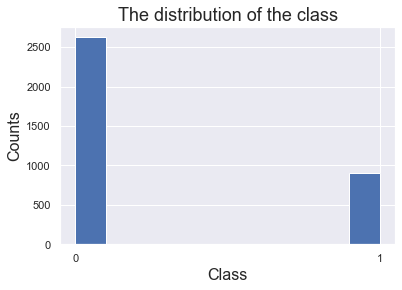

In [25]:
#plot the distribution
sns.set_theme()
plt.hist(df.label.astype('string'))
plt.title("The distribution of the class",fontsize=18)
plt.xlabel("Class",fontsize=16)
plt.ylabel("Counts",fontsize=16)

The counts of the two classes are imblanced. The labels are binary value. For the decision tree, it is not largely influenced by the imbalanced dataset property. In order to maintain the original imblanced distribution of the two classes, the dataset is not modified by means of upper-sampling, SMOTE, and other sampling methods to deal with imblanced issue.

# Baseline model for comparison

In [26]:
#define a baseline model which random assign labels
def random_classifier(y_data):
    ypred=[]
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))
    print("-----RANDOM CLASSIFIER-----")
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data,ypred))

random_classifier(df.label)

-----RANDOM CLASSIFIER-----
accuracy 0.4939145202377583
percision, recall, fscore, (array([0.74219653, 0.25568497]), array([0.48895659, 0.50826902]), array([0.58953168, 0.3402214 ]), array([2626,  907], dtype=int64))


The accuracy for a random classifier is around 0.48, which makes sense to the random guess. The precision score is biased considering the imbalanced data distribution. 

# Feature Selection

In [27]:
# transfer the raw text data into matrix with countVectorizer
cv = CountVectorizer(analyzer='word',min_df=0.001)
content  = df.text
vector = cv.fit_transform(content)
data = vector.toarray()
index_name = cv.get_feature_names_out()
# transfer the vector with tf-idf methods, which is used to give different weights to words in terms of its frequency. Therefore, each words would contribute differently to the outcome. 
tfidf = TfidfTransformer()
x_tf = tfidf.fit_transform(vector)

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x,y = sm.fit_resample(x_tf, df['label'])

This model try to use texts to classify, so our features are texts transformed by a natural language pipeline, and thereafter using tf-idf to transform the data into matrix.This method is used to give different weights to words in terms of its frequency. Therefore, each words would contribute differently to the outcome. 

In [29]:
# train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Model Tuning 

In [30]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_train,y_train)

    yp_train=model.predict(X_train)
    yp_test=model.predict(X_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train,pos_label=1)])


In [31]:
y1_train = [i[1] for i in train_results]
y1_test = [i[1] for i in test_results]
y2_train = [i[2] for i in train_results]
y2_test = [i[2] for i in test_results]
y3_train = [i[3] for i in train_results]
y3_test = [i[3] for i in test_results]

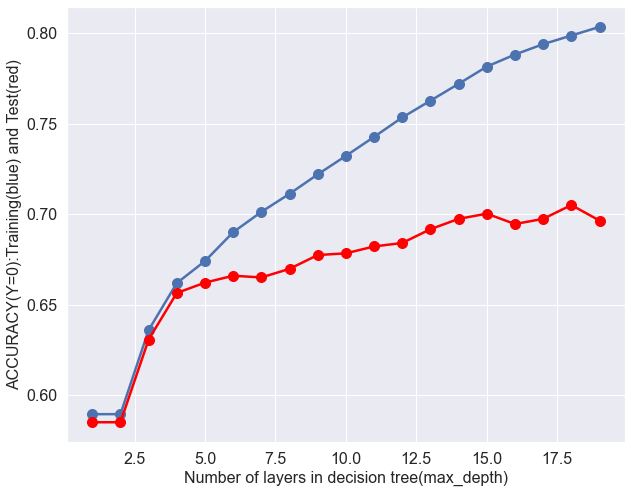

In [32]:
sns.set_theme()
fig,ax = plt.subplots(figsize=(10,8))
x = list(range(1,20))
ax.plot(x,y1_train,marker='.',color='b',linewidth=2.5,markersize=20)
ax.plot(x,y1_test,color='red',linewidth=2.5,markersize=20,marker='.')
plt.xlabel('Number of layers in decision tree(max_depth)',fontsize=16)
plt.ylabel('ACCURACY(Y=0):Training(blue) and Test(red)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

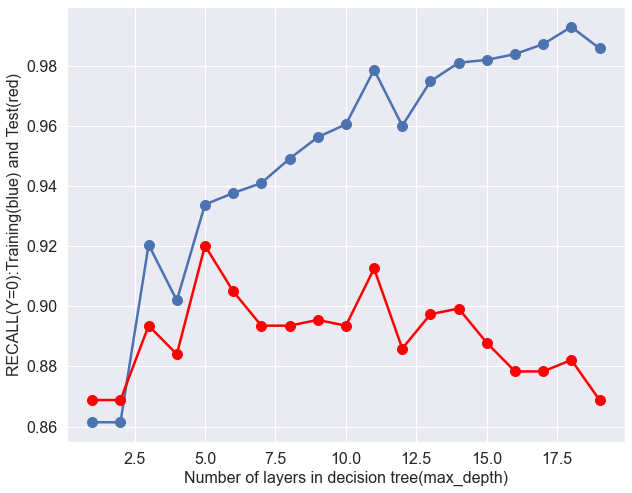

In [33]:
sns.set_theme()
fig,ax = plt.subplots(figsize=(10,8))
x = list(range(1,20))
ax.plot(x,y2_train,marker='.',color='b',linewidth=2.5,markersize=20)
ax.plot(x,y2_test,color='red',linewidth=2.5,markersize=20,marker='.')
plt.xlabel('Number of layers in decision tree(max_depth)',fontsize=16)
plt.ylabel('RECALL(Y=0):Training(blue) and Test(red)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

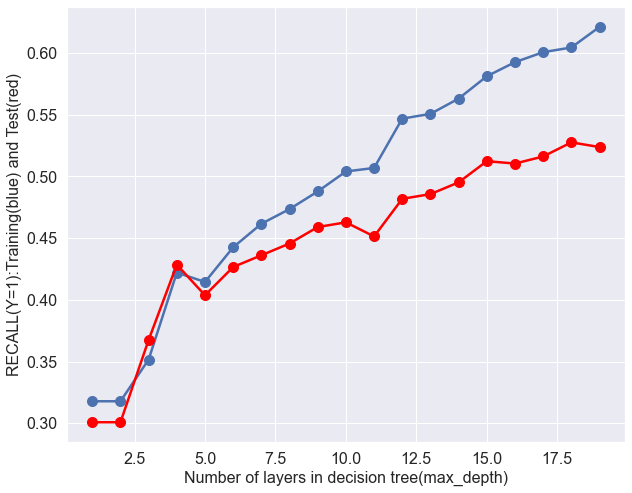

In [34]:
sns.set_theme()
fig,ax = plt.subplots(figsize=(10,8))
x = list(range(1,20))
ax.plot(x,y3_train,marker='.',color='b',linewidth=2.5,markersize=20)
ax.plot(x,y3_test,color='red',linewidth=2.5,markersize=20,marker='.')
plt.xlabel('Number of layers in decision tree(max_depth)',fontsize=16)
plt.ylabel('RECALL(Y=1):Training(blue) and Test(red)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

After using cross validation, and plotting all the analytical results, we can derive that when the max_depth is 11, the accuracy and recall score is sub-optimal.

# Final Results

In [35]:
clf = DecisionTreeClassifier(criterion="gini",max_depth=11)
clf.fit(X_train,y_train)
y_pre = clf.predict(X_test)

ACCURACY: 0.6850618458610847
NEGATIVE RECALL (Y=0): 0.9125475285171103
NEGATIVE PRECISION (Y=0): 0.6274509803921569
POSITIVE RECALL (Y=1): 0.45714285714285713
POSITIVE PRECISION (Y=1): 0.8391608391608392



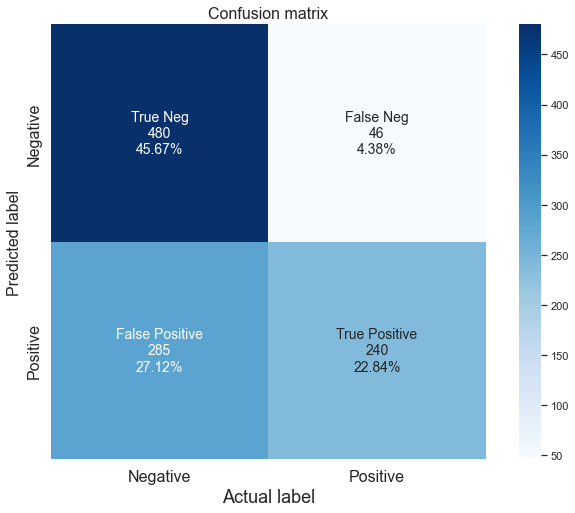

In [36]:
#confusion matrix
from matplotlib.pyplot import xticks
from sklearn.metrics import confusion_matrix
fig,ax = plt.subplots(figsize=(12,8))
mx = confusion_matrix(y_test,y_pre)
# cmd = ConfusionMatrixDisplay(mx,display_labels=['Positive','Negative'])
group_names = ['True Neg','False Neg','False Positive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                mx.flatten()]
group_percentages = ["{:.2%}".format(value) for value in mx.flatten()/np.sum(mx) ]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.array(labels).reshape(2,2)
sns.heatmap(data=mx,annot=labels,fmt='',cmap='Blues',square=True,annot_kws={"fontsize":14})
ax.set_title('Confusion matrix',fontsize=16)
plt.xlabel('Actual label',fontsize=18)
plt.ylabel('Predicted label',fontsize=16)
ax.set_xticklabels(['Negative','Positive'],fontsize=16)
ax.set_yticklabels(['Negative','Positive'],fontsize=16)
plt.savefig('./confusion_matrix.png')
print(
        "ACCURACY: "+str(accuracy_score(y_test,y_pre))+"\n"+
        "NEGATIVE RECALL (Y=0): "+str(recall_score(y_test,y_pre,pos_label=0))+"\n"+
        "NEGATIVE PRECISION (Y=0): "+str(precision_score(y_test,y_pre,pos_label=0))+"\n"+
        "POSITIVE RECALL (Y=1): "+str(recall_score(y_test,y_pre,pos_label=1))+"\n"+
        "POSITIVE PRECISION (Y=1): "+str(precision_score(y_test,y_pre,pos_label=1))+"\n"
    )
# from sklearn import tree
# def plot_tree(model,X,Y):
#     fig = plt.figure(figsize=(25,20))
#     clf = model.fit(X,Y)
#     tree.plot_tree(clf,filled=True)
# model = tree.DecisionTreeClassifier(criterion="gini",max_depth=11)
# plot_tree(model,X=X_train,Y=y_train)

 Decision Tree is a greedy algorithm, and it means that it can be easily overfitted.Considering choosing the max_depth to be 11, the bias may increase, but the variance is reduced accoriding to the variance and bias trade-off issue.

# Conclusion 

The final result is shown in the confusion matrix. While the treemap may reflect few useful information since the features contained in a sparse matrix, the confusion matrix do make clear relection of the accuracy and recall rate. The accuracy reaches 0.85, which is a little bit higher than the random classifer. The positive recall rate is pretty terrible. 

In a nutshell, I still need to mine more data to train this classification model, and helpfully, use SMOTE algorithms or lower-sampling methods to deal with imbalanced data.